In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
style.use('ggplot')

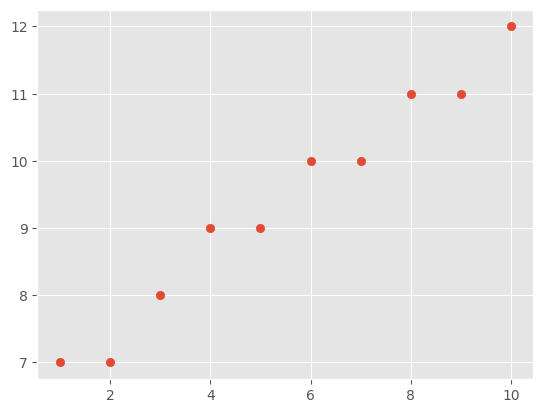

In [54]:
x=np.array([1,2,3,4,5,6,7,8,9,10],dtype=np.float64)
y=np.array([7,7,8,9,9,10,10,11,11,12],dtype=np.float64)
plt.scatter(x,y)
plt.show()


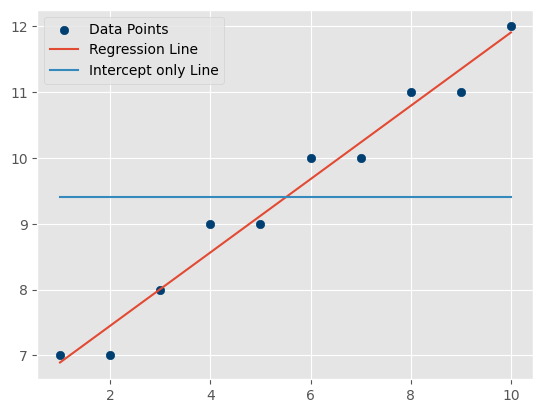

In [55]:
def calc_slope(x_values, y_values):
    rho = np.corrcoef(x_values, y_values)[0][1]
    std_y = y_values.std()
    std_x = x_values.std()
    m = rho * (std_y / std_x)
    return m

def intercept(m, x_values, y_values):
    y_mean = y_values.mean()
    x_mean = x_values.mean()
    c = y_mean - m * x_mean
    return c

# Plotting code outside the function
fig, ax = plt.subplots()
ax.scatter(x, y, color='#003F72', label='Data Points')
m = calc_slope(x, y)
c = intercept(m, x, y)
regression_line = m * x + c
ax.plot(x, regression_line, label='Regression Line')
intercept_line = np.array([y.mean() for _ in x])
ax.plot(x, intercept_line, label='Intercept only Line')
ax.legend()
plt.show()


In [56]:
ess=((regression_line-intercept_line)**2).sum()
ess

np.float64(25.64848484848485)

In [69]:
residuals = y - regression_line
rss = ((y - regression_line) ** 2).sum()
rss

np.float64(0.7515151515151511)

In [70]:
model_df=1
mse_model=ess/model_df
mse_model

np.float64(25.64848484848485)

In [71]:
residual_df=len(y)-2
residual_df

8

In [72]:
mse_residual = rss/residual_df
mse_residual

np.float64(0.09393939393939389)

In [73]:
f_statistic = mse_model / mse_residual
f_statistic

np.float64(273.03225806451627)

In [74]:
pvalue =stats.f.sf(f_statistic, model_df, residual_df)
pvalue

np.float64(1.8163490607473663e-07)

In [77]:
tss=((y-intercept_line)**2).sum()
tss

np.float64(26.4)

In [79]:
r_squared=ess/tss
r_squared

np.float64(0.9715335169880625)